<div style="text-align: center;">
  <h1>Customer Preference Analysis: Understanding Food Choices Across Cuisines</h1>
    <h3>Srimanta Ghosh</h3>
</div>

### Introduction:

Understanding customer preferences and perceptions is crucial for restaurants to thrive in the competitive food industry. In this analysis, we delve into restaurant data to uncover insights into how different cuisines are perceived and rated by customers. We focus on various aspects, including aggregate ratings, rating text sentiment, and rating color sentiment, to gain a comprehensive understanding of customer preferences across different cuisines.

Through this exploration, we aim to identify:
- Which cuisines tend to receive higher aggregate ratings?
- How do customers perceive different cuisines based on rating text sentiment?
- What role does rating color sentiment play in shaping customer perceptions of various cuisines?

By analyzing these factors, restaurants can gain valuable insights into customer preferences and tailor their offerings and marketing strategies accordingly. This analysis not only helps restaurants enhance customer satisfaction but also enables them to stay competitive in the ever-evolving food industry landscape.


### 1. Loading the Dataset and Handling Missing Values
- This code loads the dataset from a CSV file and displays the first three rows.
- It then checks for missing values in the dataset and drops any rows with missing values to ensure data completeness.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv(r"C:\Users\gh22s\AppData\Local\Programs\Python\Python312\Scripts\notebooks\Cognifyz\Dataset .csv")

In [2]:
data.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [3]:
data.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [4]:
# Handle missing values
data.dropna(inplace=True)

### 2. Iterating Over Unique City Names for Each Country Code
- This code iterates over unique country codes in the dataset.
- For each country code, it filters the dataset to obtain data for that specific country.
- It then extracts unique city names within that country and prints them out.

In [5]:
# Iterate over unique country codes and print unique city names
country_codes = data['Country Code'].unique().tolist()
for country_code in country_codes:
    # Filter data for the current country code
    country_data = data[data['Country Code'] == country_code]
    # Get unique cities
    unique_cities = country_data['City'].unique()
    # Print unique city names
    print(f'Country Code: {country_code}')
    print(', '.join(unique_cities))
    print()  # Add empty line for separation between country codes

Country Code: 162
Makati City, Mandaluyong City, Pasay City, Pasig City, Quezon City, San Juan City, Santa Rosa, Tagaytay City, Taguig City

Country Code: 30
Bras�_lia, Rio de Janeiro, S��o Paulo

Country Code: 216
Albany, Athens, Augusta, Boise, Cedar Rapids/Iowa City, Clatskanie, Cochrane, Columbus, Dalton, Davenport, Des Moines, Dubuque, Fernley, Gainesville, Lakeview, Lincoln, Macon, Mc Millan, Monroe, Ojo Caliente, Orlando, Pensacola, Pocatello, Potrero, Princeton, Rest of Hawaii, Savannah, Sioux City, Tampa Bay, Valdosta, Vernonia, Waterloo, Weirton, Winchester Bay

Country Code: 14
Armidale, Balingup, Beechworth, Dicky Beach, East Ballina, Flaxton, Forrest, Hepburn Springs, Huskisson, Inverloch, Lakes Entrance, Lorn, Macedon, Mayfield, Middleton Beach, Montville, Palm Cove, Paynesville, Penola, Phillip Island, Tanunda, Trentham East, Victor Harbor

Country Code: 37
Chatham-Kent, Consort, Vineland Station, Yorkton

Country Code: 184
Singapore

Country Code: 214
Abu Dhabi, Dubai, 

### 3. Splitting Multiple Cuisines into Individual Rows
- This code splits multiple cuisines listed in a single row into individual rows.
- It creates a new DataFrame where each row corresponds to a single cuisine associated with a restaurant.
- This transformation allows for easier analysis based on individual cuisines.

In [6]:
# Splitting multiple cuisines into individual rows
data_expanded = data.assign(Cuisines=data['Cuisines'].str.split(', ')).explode('Cuisines')

In [7]:
df = pd.DataFrame(data_expanded)
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,French,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,Desserts,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,Seafood,...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


### 4. Visualizing Average Rating by City
- This code calculates the average rating for each city based on restaurant data.
- It then visualizes the average rating for each city using a horizontal bar plot.
- Cities are sorted by their average ratings in descending order.
- The plot provides insights into the distribution of ratings across different cities.

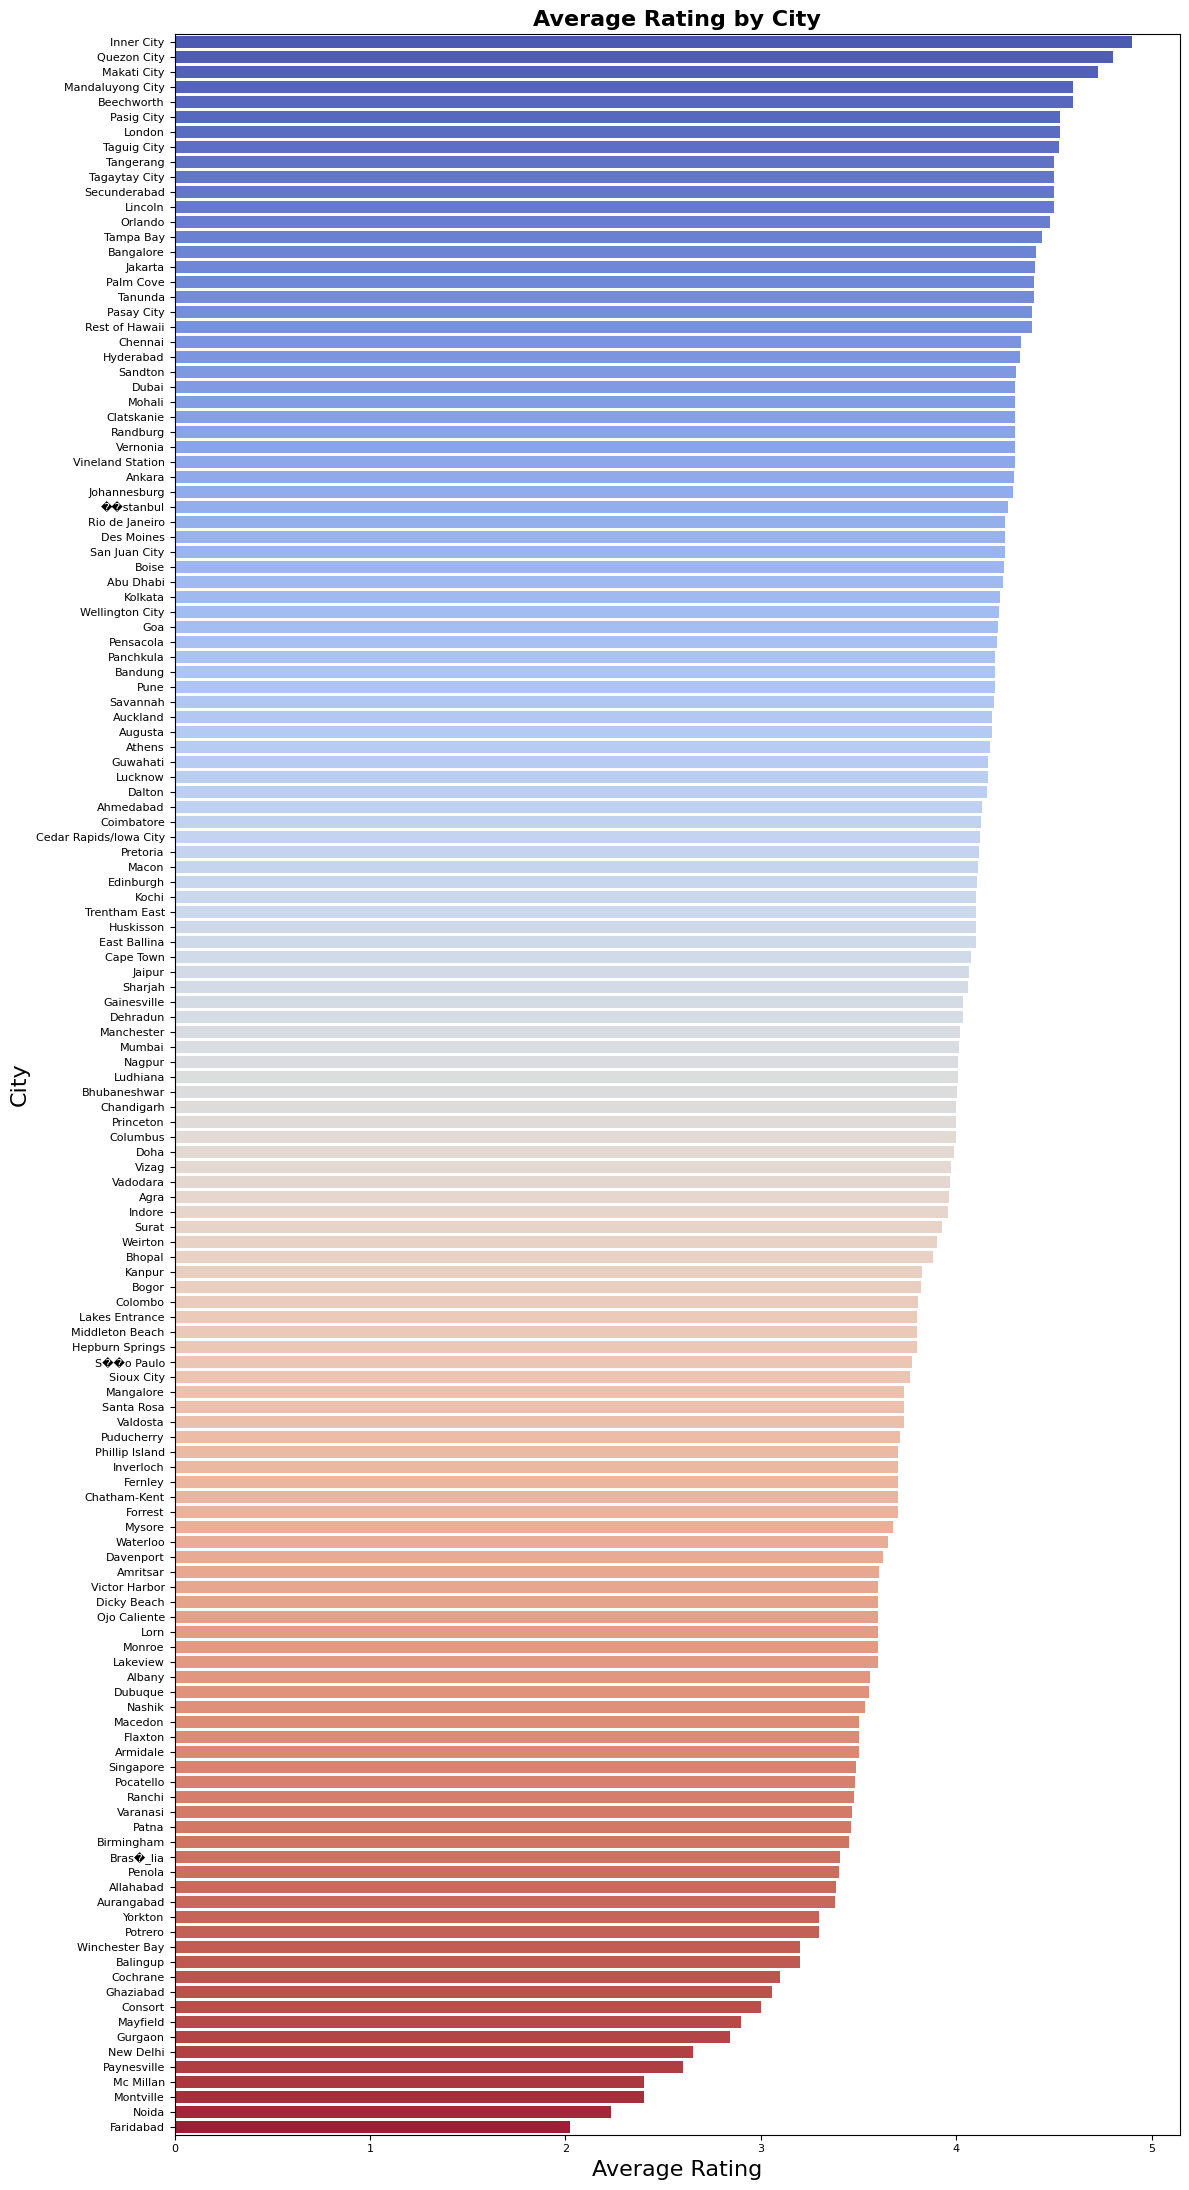

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warning about missing glyphs
warnings.filterwarnings("ignore", category=UserWarning)

# Calculate average rating by city
avg_rating_by_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 22))
sns.barplot(x=avg_rating_by_city.values, y=avg_rating_by_city.index, hue=avg_rating_by_city.index, palette='coolwarm', legend=False)

# Titles and labels
plt.title('Average Rating by City', fontsize=16, fontweight='bold')
plt.xlabel('Average Rating', fontsize=16)
plt.ylabel('City', fontsize=16)

# Customize ticks
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### 5. Identifying the City with the Highest and Lowest Average Aggregate Ratings
- This code identifies the city with the highest and lowest average aggregate ratings.
- It finds the city with the maximum and minimum average ratings using the idxmax() and idxmin() functions, respectively.
- After identifying these cities, it filters the DataFrame to extract details of restaurants located in these cities.
- The code then prints out the details of restaurants in both the highest and lowest rated cities.

In [9]:
# Identify the city with the highest average aggregate rating
city_with_highest_rating = avg_rating_by_city.idxmax()

# Filter the dataframe to get all restaurant details for the city with the highest average aggregate rating
restaurants_in_highest_rated_city = df[df['City'] == city_with_highest_rating]

# Display the details of all restaurants in that city
print(f"Restaurant details for the city with the highest average aggregate rating ({city_with_highest_rating}):")
Best_rated_City = pd.DataFrame(restaurants_in_highest_rated_city)
Best_rated_City

Restaurant details for the city with the highest average aggregate rating (Inner City):


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9457,6501534,Cube - Tasting Kitchen,189,Inner City,"24 Albrecht Road, Maboneng Precinct, City and ...",City and Suburban,"City and Suburban, Inner City",28.060192,-26.203278,European,...,Rand(R),No,No,No,No,4,4.9,Dark Green,Excellent,441
9457,6501534,Cube - Tasting Kitchen,189,Inner City,"24 Albrecht Road, Maboneng Precinct, City and ...",City and Suburban,"City and Suburban, Inner City",28.060192,-26.203278,Contemporary,...,Rand(R),No,No,No,No,4,4.9,Dark Green,Excellent,441
9458,18339373,Urbanologi,189,Inner City,"1 Fox Street, Marshalltown, Inner City, Johann...",Marshalltown,"Marshalltown, Inner City",28.031863,-26.207091,Tapas,...,Rand(R),No,No,No,No,4,4.9,Dark Green,Excellent,194


In [10]:
# Identify the city with the lowest average aggregate rating
city_with_lowest_rating = avg_rating_by_city.idxmin()

# Filter the dataframe to get all restaurant details for the city with the lowest average aggregate rating
restaurants_in_lowest_rated_city = df[df['City'] == city_with_lowest_rating]

# Display the details of all restaurants in that city
print(f"Restaurant details for the city with the lowwest average aggregate rating ({city_with_lowest_rating}):")
Worst_rated_City = pd.DataFrame(restaurants_in_lowest_rated_city)
Worst_rated_City.head()

Restaurant details for the city with the lowwest average aggregate rating (Faridabad):


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
865,301728,Desire Foods,1,Faridabad,"G 25/22, Main Road, 40 Feet, Molarband Extensi...",Badarpur Border,"Badarpur Border, Faridabad",77.306640,28.490059,Chinese,...,Indian Rupees(Rs.),No,No,No,No,1,2.9,Orange,Average,4
865,301728,Desire Foods,1,Faridabad,"G 25/22, Main Road, 40 Feet, Molarband Extensi...",Badarpur Border,"Badarpur Border, Faridabad",77.306640,28.490059,Fast Food,...,Indian Rupees(Rs.),No,No,No,No,1,2.9,Orange,Average,4
865,301728,Desire Foods,1,Faridabad,"G 25/22, Main Road, 40 Feet, Molarband Extensi...",Badarpur Border,"Badarpur Border, Faridabad",77.306640,28.490059,Bakery,...,Indian Rupees(Rs.),No,No,No,No,1,2.9,Orange,Average,4
866,5992,Knight Rock,1,Faridabad,"11/6, Delhi Mathura Road, Near Bharat Petrol P...",Badarpur Border,"Badarpur Border, Faridabad",77.304776,28.490157,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,2.8,Orange,Average,16
866,5992,Knight Rock,1,Faridabad,"11/6, Delhi Mathura Road, Near Bharat Petrol P...",Badarpur Border,"Badarpur Border, Faridabad",77.304776,28.490157,Chinese,...,Indian Rupees(Rs.),No,No,No,No,2,2.8,Orange,Average,16


### 6. Calculating Average Aggregate Rating for Each Country Code
- This code calculates the average aggregate rating for each country code present in the dataset.
- It groups the data by the 'Country Code' column and calculates the mean of the 'Aggregate rating' for each group.
- The resulting Series contains the average ratings for each country code, providing insights into the overall rating trends across different countries.

In [11]:
# Calculate average aggregate rating for each country code
average_rating_per_country = df.groupby('Country Code')['Aggregate rating'].mean()

# Print the average aggregate rating for each country code
print("Average Aggregate Rating for Each Country Code:")
print(average_rating_per_country)


Average Aggregate Rating for Each Country Code:
Country Code
1      2.744108
14     3.689796
30     3.851000
37     3.700000
94     4.334043
148    4.200000
162    4.442593
166    3.987879
184    3.486275
189    4.166279
191    3.802174
208    4.282456
214    4.194853
215    4.052667
216    4.009276
Name: Aggregate rating, dtype: float64


### 7. Visualizing Average Aggregate Rating by Country Code
- This code visualizes the average aggregate rating for each country code using a bar plot.
- It creates a bar plot where each bar represents the average rating for a specific country code.
- The x-axis represents the country codes, and the y-axis represents the average aggregate ratings.
- Annotations are added to each bar to display the exact value of the average rating.

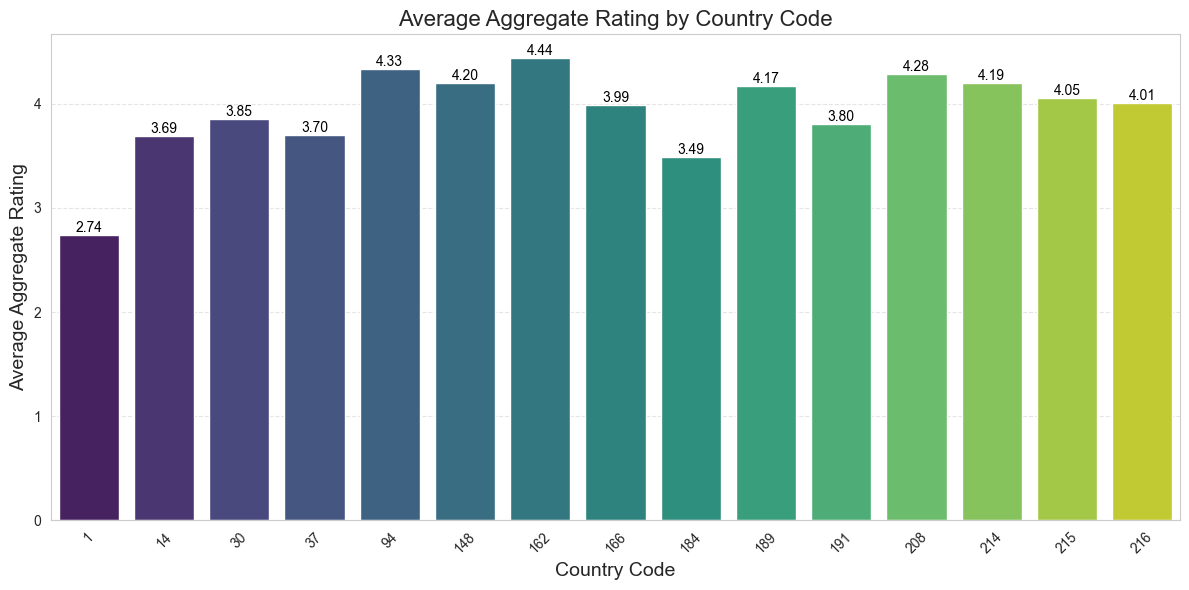

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set the style
sns.set_style("whitegrid")

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar plot of average aggregate rating for each country code
ax = sns.barplot(x=average_rating_per_country.index, y=average_rating_per_country.values, palette='viridis')

# Add labels and title with increased font size
plt.xlabel('Country Code', fontsize=14)
plt.ylabel('Average Aggregate Rating', fontsize=14)
plt.title('Average Aggregate Rating by Country Code', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate each bar with its corresponding value
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points',
                fontsize=10, color='black')

# Show plot
plt.tight_layout()
plt.show()


### 8. Identifying Details of Restaurants in the Country with the Highest Aggregate Rating
- This code identifies the country with the highest average aggregate rating among all countries.
- It filters the dataset to extract details of restaurants located in the country with the highest aggregate rating.
- The code then prints out the details of restaurants in the country with the highest average rating.

In [13]:
# Find the country code with the highest aggregate rating
highest_rating_country = df.groupby('Country Code')['Aggregate rating'].mean().idxmax()

# Filter the dataset for the country with the highest rating
highest_rating_details = df[df['Country Code'] == highest_rating_country]

# Display details of restaurants in the country with the highest rating
print("Details of restaurants in the country with the highest aggregate rating:")
Best_rated_Country = pd.DataFrame(highest_rating_details)
Best_rated_Country.head()

Details of restaurants in the country with the highest aggregate rating:


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,French,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,Desserts,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,Seafood,...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


### 9. Displaying Details of the Highest and Lowest Rated Restaurants in the Highest Rated Country
- This code identifies the highest and lowest rated restaurants within the country with the highest average aggregate rating.
- It sorts the filtered data by aggregate rating in descending order to find the highest-rated restaurant and in ascending order to find the lowest-rated restaurant.
- The code then prints out the details of both the highest-rated and lowest-rated restaurants.

In [14]:
# Filter the dataset for the country with the highest rating
highest_rating_details = df[df['Country Code'] == highest_rating_country]

# Sort the filtered data by aggregate rating in descending order to get the highest-rated restaurant first
highest_rated_restaurant = highest_rating_details.sort_values(by='Aggregate rating', ascending=False).iloc[0]

# Sort the filtered data by aggregate rating in ascending order to get the lowest-rated restaurant first
lowest_rated_restaurant = highest_rating_details.sort_values(by='Aggregate rating').iloc[0]

# Display details of the highest-rated restaurant
print("Details of the highest-rated restaurant:")
print(highest_rated_restaurant)

# Display details of the lowest-rated restaurant
print("\nDetails of the lowest-rated restaurant:")
print(lowest_rated_restaurant)

Details of the highest-rated restaurant:
Restaurant ID                                                6309903
Restaurant Name                                     Silantro Fil-Mex
Country Code                                                     162
City                                                      Pasig City
Address                 75 East Capitol Drive, Kapitolyo, Pasig City
Locality                                                   Kapitolyo
Locality Verbose                               Kapitolyo, Pasig City
Longitude                                                 121.057916
Latitude                                                   14.567689
Cuisines                                                     Mexican
Average Cost for two                                             800
Currency                                            Botswana Pula(P)
Has Table booking                                                 No
Has Online delivery                                           

### 10. Encoding Rating Text and Rating Color Columns with Custom Sentiment Scores
- This code snippet defines mapping dictionaries to encode the 'Rating Text' and 'Rating Color' columns with custom sentiment scores.
- The 'Rating Text' column is mapped to sentiment scores ranging from 0 (for "Not rated" and "Average") to 1 (for "Excellent").
- Similarly, the 'Rating Color' column is mapped to sentiment scores ranging from -0.5 (for "Red") to 0.5 (for "Dark Green").
- These custom sentiment scores provide a quantitative representation of the qualitative ratings and colors, facilitating further analysis.

In [15]:
df['Rating text'].unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

In [16]:
df['Rating color'].unique()

array(['Dark Green', 'Green', 'Yellow', 'Orange', 'White', 'Red'],
      dtype=object)

In [17]:
# Filter out rows with rating text as "Not rated" and rating color as "White"
dff = df[(df['Rating text'] != 'Not rated') & (df['Rating color'] != 'White')].copy()

In [18]:
# Define mapping dictionaries for rating text and rating color with custom sentiment scores
rating_text_sentiment_mapping = {
    'Poor': 0,
    'Average': 0.25,
    'Good': 0.5,
    'Very Good': 0.75,
    'Excellent': 1
}

rating_color_sentiment_mapping = {
    'Red': 0,
    'Orange': 0.25,
    'Yellow': 0.5,
    'Green': 0.75,
    'Dark Green': 1
}

# Encode rating text and rating color columns based on custom sentiment scores
dff['Rating Text Sentiment'] = dff['Rating text'].map(rating_text_sentiment_mapping)
dff['Rating Color Sentiment'] = dff['Rating color'].map(rating_color_sentiment_mapping)

### 11. Visualizing Sentiment Analysis for Best and Worst Rated Country Codes
- This code snippet visualizes sentiment analysis for the best and worst rated country codes based on custom sentiment scores derived from 'Rating Text' and 'Rating Color' columns.
- It first identifies the country codes with the highest and lowest average aggregate ratings.
- Then, it filters the dataset to obtain data for the best and worst rated country codes.
- Subplots are created to display histograms for the sentiment analysis of 'Rating Text', 'Rating Color', and 'Aggregate Rating' columns for both the best and worst rated country codes.
- These histograms provide insights into the distribution of sentiment scores and ratings for the best and worst rated countries.

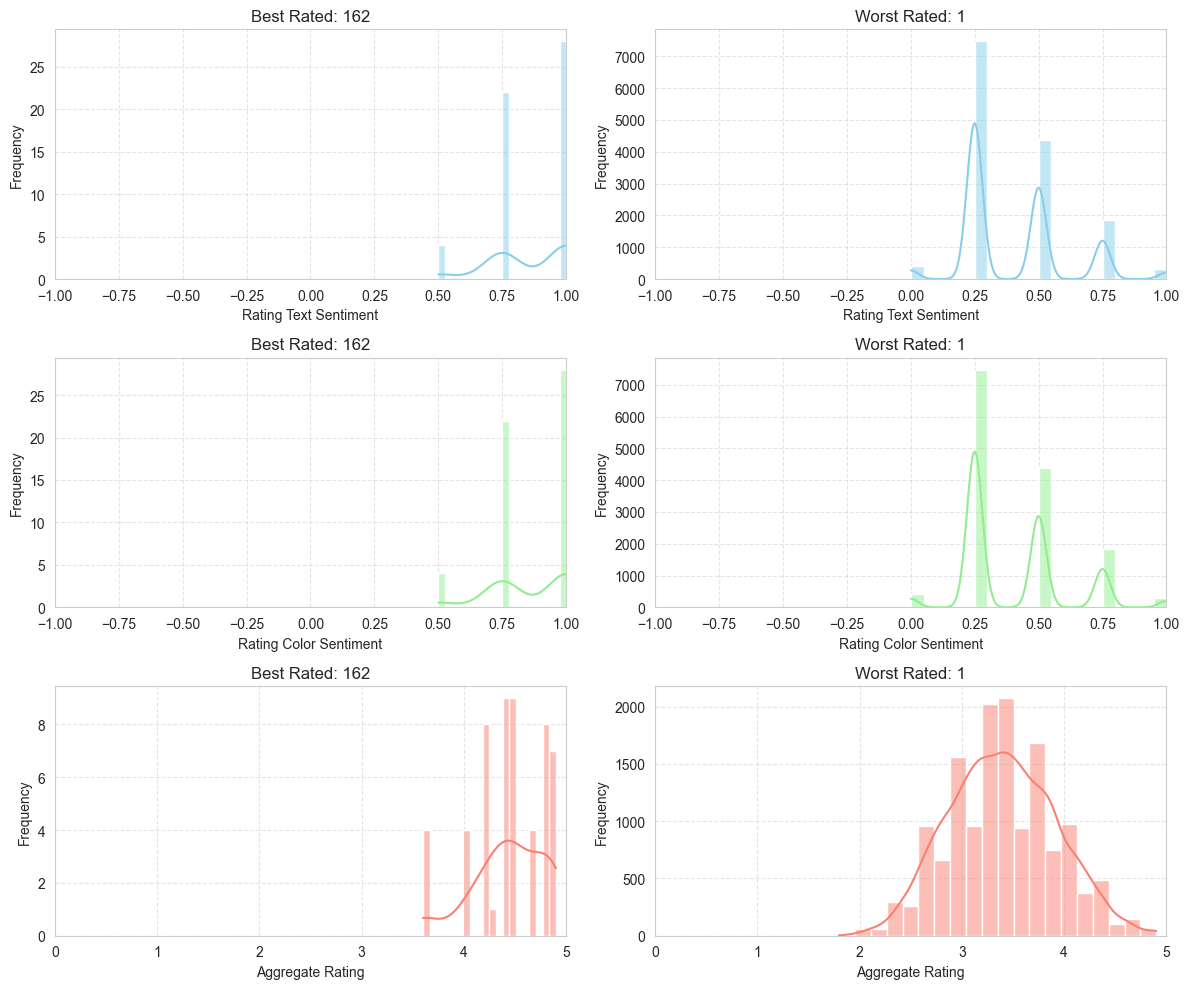

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_style("whitegrid")

# Find the country codes with the highest and lowest aggregate ratings
best_country_code = dff.groupby('Country Code')['Aggregate rating'].mean().idxmax()
worst_country_code = dff.groupby('Country Code')['Aggregate rating'].mean().idxmin()

# Filter data for the best and worst country codes
best_country_data = dff[dff['Country Code'] == best_country_code]
worst_country_data = dff[dff['Country Code'] == worst_country_code]

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Plot for best-rated country code - Rating Text Sentiment
sns.histplot(best_country_data['Rating Text Sentiment'], bins=20, kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title(f"Best Rated: {best_country_code}")
axes[0, 0].set_xlabel('Rating Text Sentiment')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_xlim(-1, 1)
axes[0, 0].grid(True, linestyle='--', alpha=0.5)

# Plot for worst-rated country code - Rating Text Sentiment
sns.histplot(worst_country_data['Rating Text Sentiment'], bins=20, kde=True, color='skyblue', ax=axes[0, 1])
axes[0, 1].set_title(f"Worst Rated: {worst_country_code}")
axes[0, 1].set_xlabel('Rating Text Sentiment')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_xlim(-1, 1)
axes[0, 1].grid(True, linestyle='--', alpha=0.5)

# Plot for best-rated country code - Rating Color Sentiment
sns.histplot(best_country_data['Rating Color Sentiment'], bins=20, kde=True, color='lightgreen', ax=axes[1, 0])
axes[1, 0].set_title(f"Best Rated: {best_country_code}")
axes[1, 0].set_xlabel('Rating Color Sentiment')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_xlim(-1, 1)
axes[1, 0].grid(True, linestyle='--', alpha=0.5)

# Plot for worst-rated country code - Rating Color Sentiment
sns.histplot(worst_country_data['Rating Color Sentiment'], bins=20, kde=True, color='lightgreen', ax=axes[1, 1])
axes[1, 1].set_title(f"Worst Rated: {worst_country_code}")
axes[1, 1].set_xlabel('Rating Color Sentiment')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_xlim(-1, 1)
axes[1, 1].grid(True, linestyle='--', alpha=0.5)

# Plot for best-rated country code - Aggregate Rating
sns.histplot(best_country_data['Aggregate rating'], bins=20, kde=True, color='salmon', ax=axes[2, 0])
axes[2, 0].set_title(f"Best Rated: {best_country_code}")
axes[2, 0].set_xlabel('Aggregate Rating')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].set_xlim(0, 5)
axes[2, 0].grid(True, linestyle='--', alpha=0.5)

# Plot for worst-rated country code - Aggregate Rating
sns.histplot(worst_country_data['Aggregate rating'], bins=20, kde=True, color='salmon', ax=axes[2, 1])
axes[2, 1].set_title(f"Worst Rated: {worst_country_code}")
axes[2, 1].set_xlabel('Aggregate Rating')
axes[2, 1].set_ylabel('Frequency')
axes[2, 1].set_xlim(0, 5)
axes[2, 1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### 12. Analyzing Cuisine Ratings and Restaurant Details
- This code snippet calculates the mean aggregate rating for each cuisine, then identifies the cuisine with the highest and lowest ratings.
- It filters the dataset to obtain details of restaurants associated with the best and worst rated cuisines based on aggregate ratings.
- The details include restaurant name, country code, city, address, cuisine, aggregate rating, rating color, rating text, and votes.
- Finally, it prints the details of restaurants with the best and worst cuisines for aggregate rating.

In [20]:
# Group by cuisine and calculate the mean aggregate rating
cuisine_rating_agg = dff.groupby('Cuisines')['Aggregate rating'].mean().reset_index()
# Sort by score in descending order
cuisine_rating_agg = cuisine_rating_agg.sort_values(by='Aggregate rating', ascending=False)

In [21]:
# Filter data for the cuisine with respect to aggregate rating
best_cuisine_agg = cuisine_rating_agg.iloc[0]['Cuisines']
best_cuisine_data_agg = dff[dff['Cuisines'] == best_cuisine_agg]
# Print the restaurant names
# Display details of the restaurants in a new DataFrame
best_cuisine_restaurants_agg_df = best_cuisine_data_agg[['Restaurant Name', 'Country Code', 'City', 'Address', 'Cuisines', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']]
# Display the new DataFrame
print("Details of restaurants with the best cuisine for aggregate rating:")
pd.DataFrame(best_cuisine_restaurants_agg_df)

Details of restaurants with the best cuisine for aggregate rating:


,Restaurant Name,Country Code,City,Address,Cuisines,Aggregate rating,Rating color,Rating text,Votes
9279,Talaga Sampireun,94,Jakarta,Jl. Lingkar Luar Barat,Sunda,4.9,Dark Green,Excellent,1662
9291,Talaga Sampireun,94,Jakarta,"Taman Impian Jaya Ancol, Jl. Lapangan Golf 7, ...",Sunda,4.9,Dark Green,Excellent,1640
9296,Talaga Sampireun,94,Tangerang,"Jl. Boulevard Bintaro Jaya Blok B7/N1, Bintaro...",Sunda,4.9,Dark Green,Excellent,2212


In [22]:
# Filter data for the cuisine with respect to aggregate rating
worst_cuisine_agg = cuisine_rating_agg.iloc[-1]['Cuisines']
worst_cuisine_data_agg = dff[dff['Cuisines'] == worst_cuisine_agg]
# Print the restaurant names
# Display details of the restaurants in a new DataFrame
worst_cuisine_restaurants_agg_df = worst_cuisine_data_agg[['Restaurant Name', 'Country Code', 'City', 'Address', 'Cuisines', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']]
# Display the new DataFrame
print("Details of restaurants with the worst cuisine for aggregate rating:")
pd.DataFrame(worst_cuisine_restaurants_agg_df)

Details of restaurants with the worst cuisine for aggregate rating:


,Restaurant Name,Country Code,City,Address,Cuisines,Aggregate rating,Rating color,Rating text,Votes
2767,Habibi Express,1,New Delhi,"47-48, Bengali Market, Barakhamba Road, New Delhi",Moroccan,2.3,Red,Poor,55
4643,Cafe Illuminatii,1,New Delhi,"2nd Floor, Shop 18, Inner Lane, Khan Market, N...",Moroccan,3.6,Yellow,Good,300
7080,Habibi Express,1,New Delhi,"My Square Food Court, Select Citywalk Mall, Sa...",Moroccan,2.2,Red,Poor,122


### 13. Visualizing Aggregate Rating Distribution for Best and Worst Rated Cuisines
- This code snippet visualizes the distribution of aggregate ratings for the best and worst rated cuisines.
- It creates subplots for each cuisine, displaying histograms of aggregate rating distributions.
- The histogram for the best-rated cuisine is plotted on the left, while the histogram for the worst-rated cuisine is plotted on the right.
- The x-axis represents aggregate rating values ranging from 0 to 5, while the y-axis represents the frequency of occurrence.
- These visualizations provide insights into the spread and concentration of ratings for different cuisines.

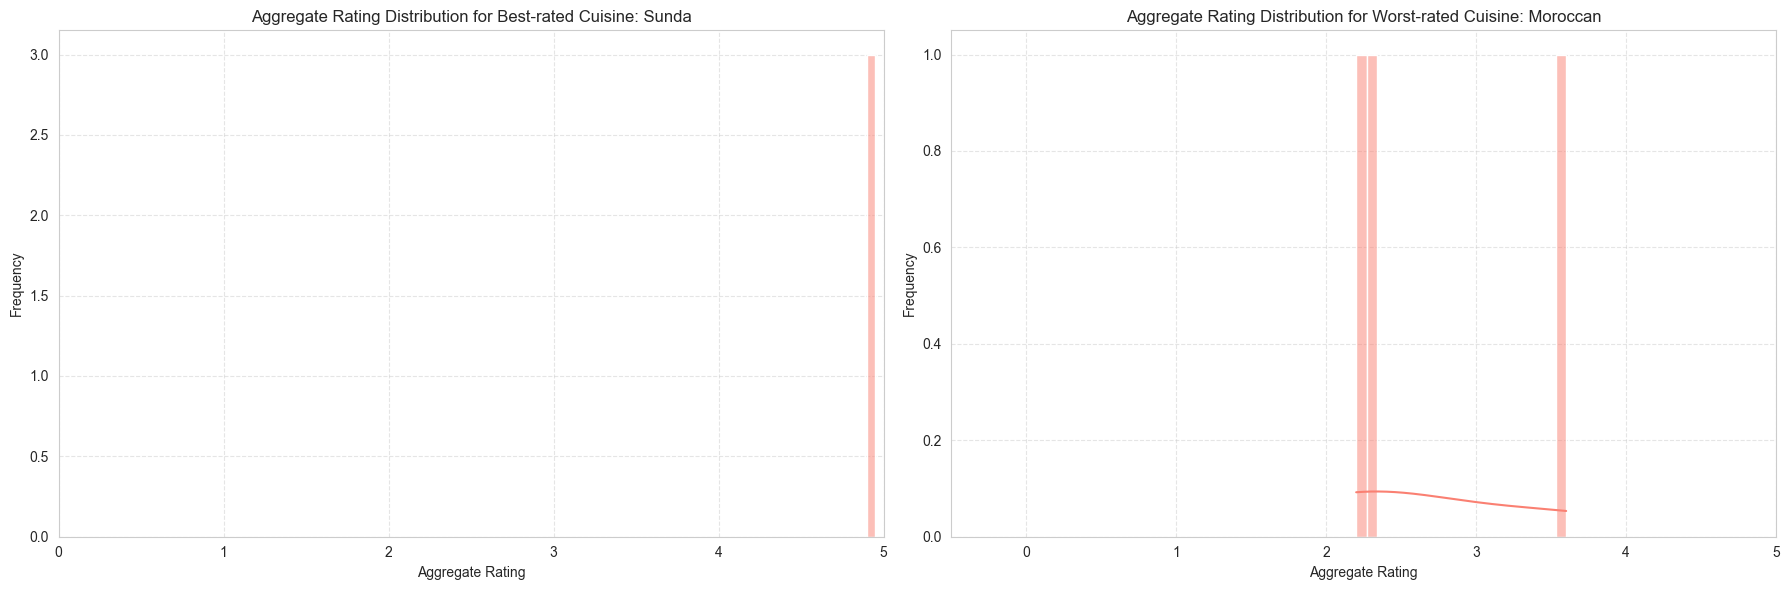

In [23]:
# Set a different font
plt.rcParams['font.family'] = 'Arial'

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Aggregate rating analysis for best-rated cuisine
sns.histplot(best_cuisine_data_agg['Aggregate rating'], bins=20, kde=True, color='salmon', ax=axes[0])
axes[0].set_title(f"Aggregate Rating Distribution for Best-rated Cuisine: {best_cuisine_agg}")
axes[0].set_xlabel('Aggregate Rating')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(0, 5)  # Set x-axis limit
axes[0].grid(True, linestyle='--', alpha=0.5)  # Add grid

# Aggregate rating analysis for worst-rated cuisine
sns.histplot(worst_cuisine_data_agg['Aggregate rating'], bins=20, kde=True, color='salmon', ax=axes[1])
axes[1].set_title(f"Aggregate Rating Distribution for Worst-rated Cuisine: {worst_cuisine_agg}")
axes[1].set_xlabel('Aggregate Rating')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(-0.5, 5)  # Set x-axis limit
axes[1].grid(True, linestyle='--', alpha=0.5)  # Add grid

plt.tight_layout()
plt.show()

### 14. Analyzing Cuisine Ratings Based on Rating Text Sentiment
- This code snippet calculates the mean sentiment score for rating text sentiment for each cuisine and identifies the cuisine with the highest and lowest sentiment scores.
- It filters the dataset to obtain details of restaurants associated with the best and worst rated cuisines based on rating text sentiment.
- The details include restaurant name, country code, city, address, cuisine, aggregate rating, rating color, rating text, and votes.
- Finally, it prints the details of restaurants with the best and worst cuisines for rating text sentiment.

In [24]:
# Group by cuisine and calculate the mean text sentiment score
cuisine_rating_text = dff.groupby('Cuisines')['Rating Text Sentiment'].mean().reset_index()
# Sort by score in descending order
cuisine_rating_text = cuisine_rating_text.sort_values(by='Rating Text Sentiment', ascending=False)

In [25]:
# Filter data for the cuisine with respect to rating text
best_cuisine_text = cuisine_rating_text.iloc[0]['Cuisines']
best_cuisine_data_text = dff[dff['Cuisines'] == best_cuisine_text]
# Print the restaurant names
# Display details of the restaurants in a new DataFrame
best_cuisine_restaurants_text_df = best_cuisine_data_text[['Restaurant Name', 'Country Code', 'City', 'Address', 'Cuisines', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']]
# Display the new DataFrame
print("Details of restaurants with the best cuisine for rating text:")
pd.DataFrame(best_cuisine_restaurants_text_df)

Details of restaurants with the best cuisine for rating text:


,Restaurant Name,Country Code,City,Address,Cuisines,Aggregate rating,Rating color,Rating text,Votes
9544,Karak�_y G�_ll�_o��lu,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",B�_rek,4.7,Dark Green,Excellent,1305


In [26]:
# Filter data for the cuisine with rating text
worst_cuisine_text = cuisine_rating_text.iloc[-1]['Cuisines']
worst_cuisine_data_text = dff[dff['Cuisines'] == worst_cuisine_text]
# Print the restaurant names
# Display details of the restaurants in a new DataFrame
worst_cuisine_restaurants_text_df = worst_cuisine_data_text[['Restaurant Name', 'Country Code', 'City', 'Address', 'Cuisines', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']]
# Display the new DataFrame
print("Details of restaurants with the worst cuisine for rating text:")
pd.DataFrame(worst_cuisine_restaurants_text_df)

Details of restaurants with the worst cuisine for rating text:


,Restaurant Name,Country Code,City,Address,Cuisines,Aggregate rating,Rating color,Rating text,Votes
2767,Habibi Express,1,New Delhi,"47-48, Bengali Market, Barakhamba Road, New Delhi",Moroccan,2.3,Red,Poor,55
4643,Cafe Illuminatii,1,New Delhi,"2nd Floor, Shop 18, Inner Lane, Khan Market, N...",Moroccan,3.6,Yellow,Good,300
7080,Habibi Express,1,New Delhi,"My Square Food Court, Select Citywalk Mall, Sa...",Moroccan,2.2,Red,Poor,122


### 15. Visualizing Rating Text Sentiment Distribution for Best and Worst Rated Cuisines
- This code snippet visualizes the distribution of rating text sentiment scores for the best and worst rated cuisines.
- It creates subplots for each cuisine, displaying histograms of rating text sentiment distributions.
- The histogram for the best-rated cuisine is plotted on the left, while the histogram for the worst-rated cuisine is plotted on the right.
- The x-axis represents sentiment scores ranging from -1 to 1, indicating negative to positive sentiments, while the y-axis represents the frequency of occurrence.
- These visualizations offer insights into the sentiment distribution of rating texts for different cuisines.

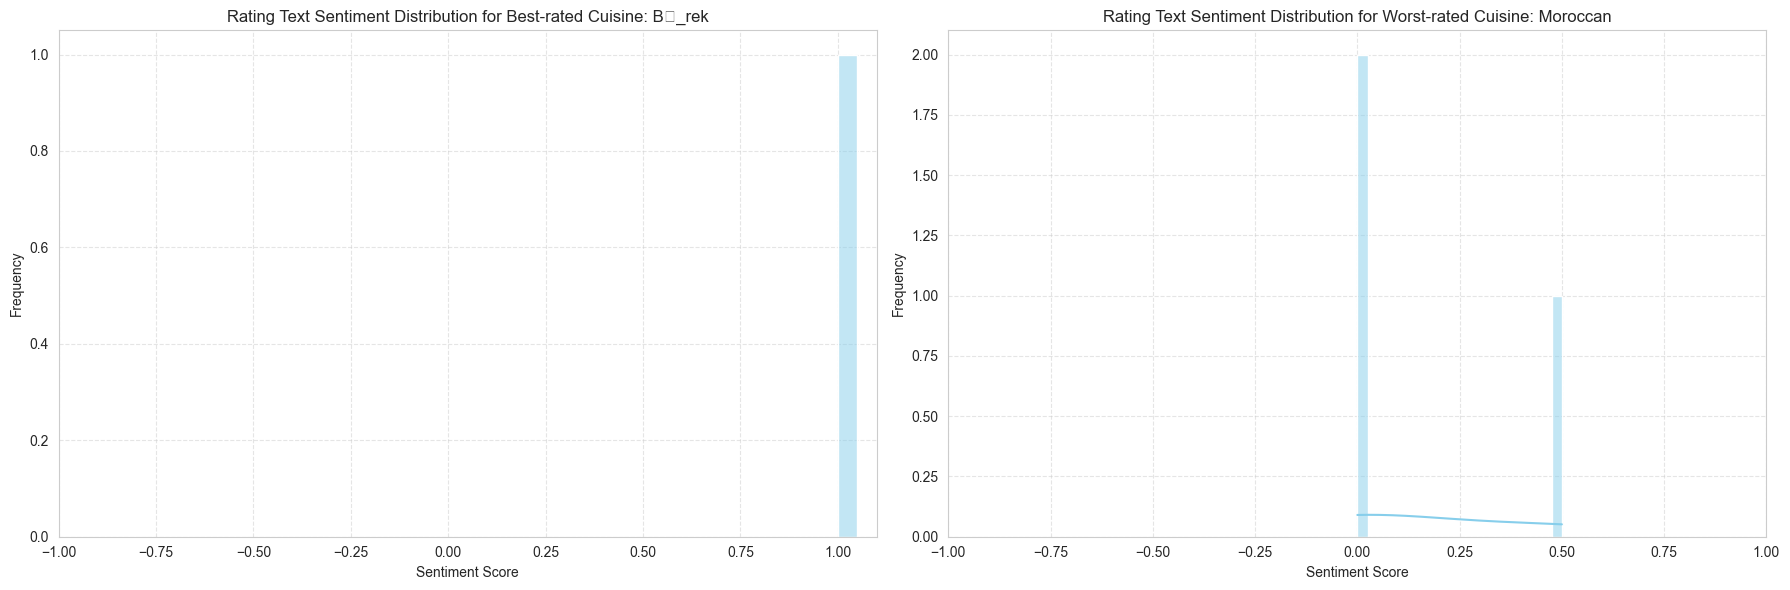

In [27]:
# Set a different font
plt.rcParams['font.family'] = 'Arial'

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Rating text sentiment analysis for best-rated cuisine
sns.histplot(best_cuisine_data_text['Rating Text Sentiment'], bins=20, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title(f"Rating Text Sentiment Distribution for Best-rated Cuisine: {best_cuisine_text}")
axes[0].set_xlabel('Sentiment Score')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(-1, 1.1)  # Set x-axis limit
axes[0].grid(True, linestyle='--', alpha=0.5)  # Add grid

# Rating text sentiment analysis for worst-rated cuisine
sns.histplot(worst_cuisine_data_text['Rating Text Sentiment'], bins=20, kde=True, color='skyblue', ax=axes[1])
axes[1].set_title(f"Rating Text Sentiment Distribution for Worst-rated Cuisine: {worst_cuisine_text}")
axes[1].set_xlabel('Sentiment Score')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(-1, 1)  # Set x-axis limit
axes[1].grid(True, linestyle='--', alpha=0.5)  # Add grid

plt.tight_layout()
plt.show()

### 16. Analyzing Cuisine Ratings Based on Rating Color Sentiment
- This code snippet calculates the mean sentiment score for rating color sentiment for each cuisine and identifies the cuisine with the highest and lowest sentiment scores.
- It filters the dataset to obtain details of restaurants associated with the best and worst rated cuisines based on rating color sentiment.
- The details include restaurant name, country code, city, address, cuisine, aggregate rating, rating color, rating text, and votes.
- Finally, it prints the details of restaurants with the best and worst cuisines for rating color sentiment.

In [28]:
# Group by cuisine and calculate the mean color sentiment score
cuisine_rating_color = dff.groupby('Cuisines')['Rating Color Sentiment'].mean().reset_index()
# Sort by score in descending order
cuisine_rating_color = cuisine_rating_color.sort_values(by='Rating Color Sentiment', ascending=False)

In [29]:
# Filter data for the cuisine with the best_cuisine_rating_color
best_cuisine_color = cuisine_rating_color.iloc[0]['Cuisines']
best_cuisine_data_color = dff[dff['Cuisines'] == best_cuisine_color]
# Print the restaurant names
# Display details of the restaurants in a new DataFrame
best_cuisine_restaurants_color_df = best_cuisine_data_color[['Restaurant Name', 'Country Code', 'City', 'Address', 'Cuisines', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']]
# Display the new DataFrame
print("Details of restaurants with the best cuisine for rating color:")
pd.DataFrame(best_cuisine_restaurants_color_df)

Details of restaurants with the best cuisine for rating color:


,Restaurant Name,Country Code,City,Address,Cuisines,Aggregate rating,Rating color,Rating text,Votes
9544,Karak�_y G�_ll�_o��lu,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",B�_rek,4.7,Dark Green,Excellent,1305


In [30]:
# Filter data for the cuisine with the worst_cuisine_rating_color
worst_cuisine_color = cuisine_rating_color.iloc[-1]['Cuisines']
worst_cuisine_data_color = dff[dff['Cuisines'] == worst_cuisine_color]
# Print the restaurant names
# Display details of the restaurants in a new DataFrame
worst_cuisine_restaurants_color_df = worst_cuisine_data_color[['Restaurant Name', 'Country Code', 'City', 'Address', 'Cuisines', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']]
# Display the new DataFrame
print("Details of restaurants with the worst cuisine for rating color:")
pd.DataFrame(worst_cuisine_restaurants_color_df)

Details of restaurants with the worst cuisine for rating color:


,Restaurant Name,Country Code,City,Address,Cuisines,Aggregate rating,Rating color,Rating text,Votes
2767,Habibi Express,1,New Delhi,"47-48, Bengali Market, Barakhamba Road, New Delhi",Moroccan,2.3,Red,Poor,55
4643,Cafe Illuminatii,1,New Delhi,"2nd Floor, Shop 18, Inner Lane, Khan Market, N...",Moroccan,3.6,Yellow,Good,300
7080,Habibi Express,1,New Delhi,"My Square Food Court, Select Citywalk Mall, Sa...",Moroccan,2.2,Red,Poor,122


### 17. Visualizing Rating Color Sentiment Distribution for Best and Worst Rated Cuisines
- This code snippet visualizes the distribution of rating color sentiment scores for the best and worst rated cuisines.
- It creates subplots for each cuisine, displaying histograms of rating color sentiment distributions.
- The histogram for the best-rated cuisine is plotted on the left, while the histogram for the worst-rated cuisine is plotted on the right.
- The x-axis represents sentiment scores ranging from -1 to 1, indicating negative to positive sentiments, while the y-axis represents the frequency of occurrence.
- These visualizations offer insights into the sentiment distribution of rating colors for different cuisines.


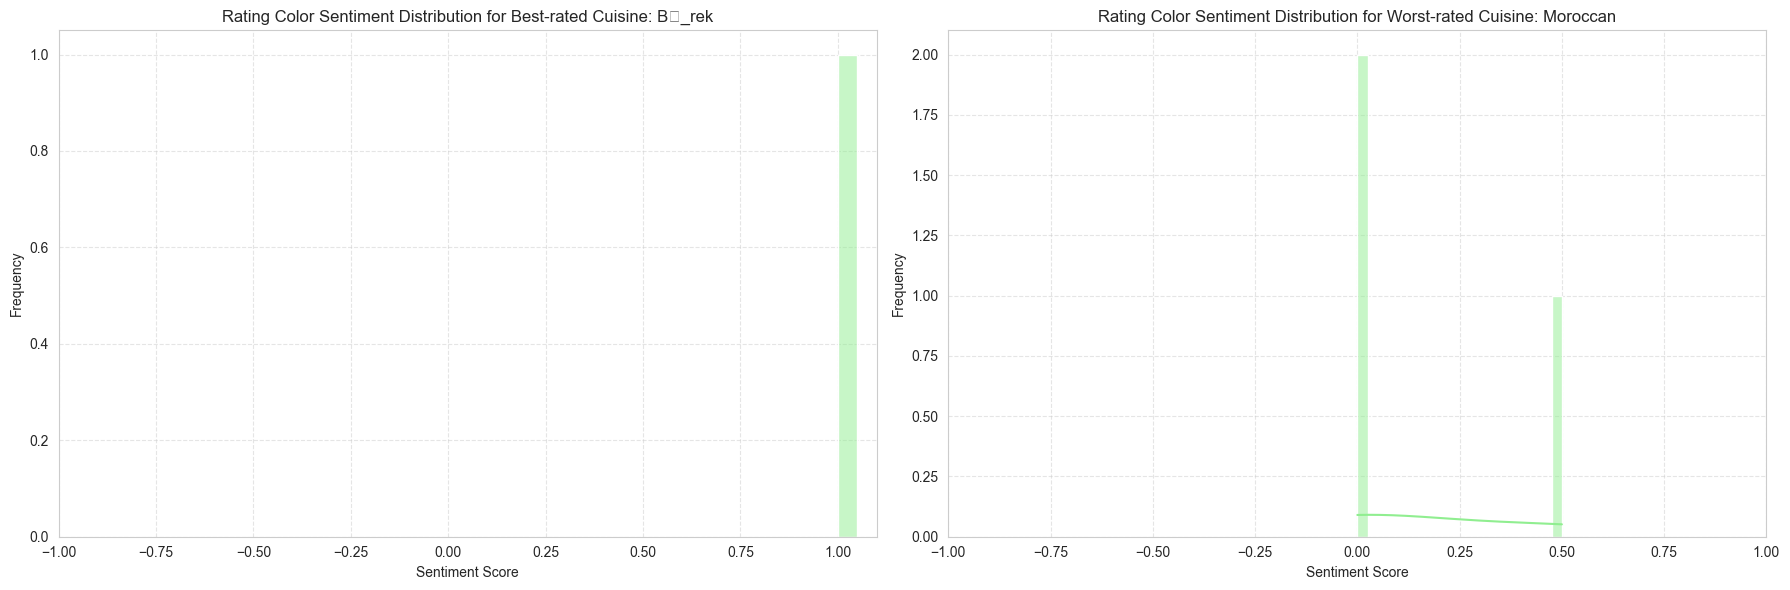

In [31]:
# Set a different font
plt.rcParams['font.family'] = 'Arial'

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Rating color sentiment analysis for best-rated cuisine
sns.histplot(best_cuisine_data_color['Rating Color Sentiment'], bins=20, kde=True, color='lightgreen', ax=axes[0])
axes[0].set_title(f"Rating Color Sentiment Distribution for Best-rated Cuisine: {best_cuisine_color}")
axes[0].set_xlabel('Sentiment Score')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(-1, 1.1)  # Set x-axis limit
axes[0].grid(True, linestyle='--', alpha=0.5)  # Add grid

# Rating color sentiment analysis for worst-rated cuisine
sns.histplot(worst_cuisine_data_color['Rating Color Sentiment'], bins=20, kde=True, color='lightgreen', ax=axes[1])
axes[1].set_title(f"Rating Color Sentiment Distribution for Worst-rated Cuisine: {worst_cuisine_color}")
axes[1].set_xlabel('Sentiment Score')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(-1, 1)  # Set x-axis limit
axes[1].grid(True, linestyle='--', alpha=0.5)  # Add grid

plt.tight_layout()
plt.show()

### Conclusion:

- Our comprehensive analysis revealed valuable insights into customer preferences and perceptions regarding various cuisines.
- We found that aggregate ratings, rating text sentiment, and rating color sentiment can all influence customers' perceptions of different cuisines.
- By understanding these factors, restaurants can better tailor their offerings and marketing strategies to meet customer expectations and preferences.
- Further research and analysis could explore additional factors influencing customer perceptions, such as price, ambience, and service quality, to gain a deeper understanding of restaurant success factors.
